## Author : Rahul Suresh

In [1]:
from utils import *
from sklearn.dummy import DummyClassifier

In [3]:
df=pd.read_csv('../../data/previous_gp/processed_cases.csv')

In [4]:
df

,Status Closed,Status Decided,Status Entry diff,Decision Entry diff,civil cases,criminal cases,appellant plaintiff,appellant defendant,appellant other,appeal court,supreme court,unknown court,prediction class
0,1,0,33177600.0,30672000.0,1,0,0,1,0,1,0,0,0
1,1,0,67564800.0,59616000.0,1,0,0,1,0,1,0,0,0
2,1,0,43981200.0,34300800.0,1,0,1,0,0,1,0,0,0
3,1,0,32227200.0,29808000.0,1,0,0,1,0,1,0,0,0
4,1,0,31363200.0,28944000.0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,0,1,28684800.0,26010000.0,0,1,0,0,1,0,0,1,0
11648,0,1,24796800.0,22294800.0,0,1,0,0,1,0,0,1,0
11649,0,1,22464000.0,19962000.0,0,1,0,0,1,0,0,1,0
11650,0,1,22204800.0,19530000.0,0,1,0,0,1,0,0,1,0


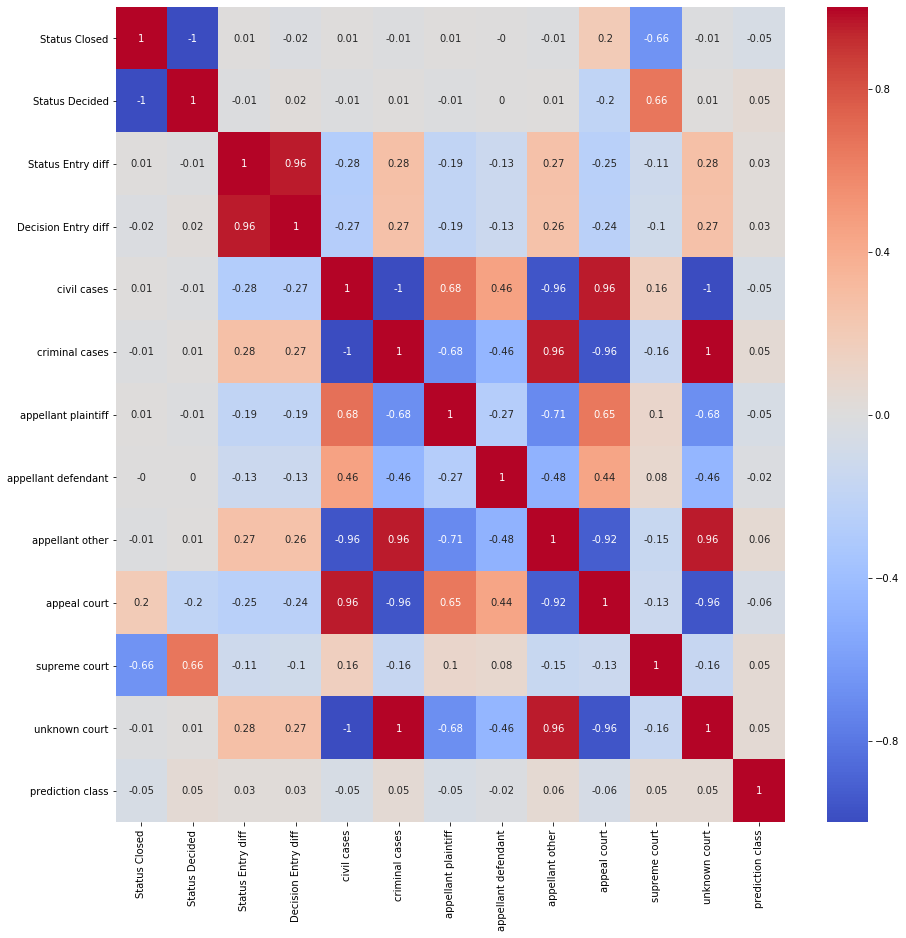

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(decimals=2),vmin=-1,
            cmap='coolwarm',
            annot=True)

### Class wise distribution

In [6]:
df['prediction class'].value_counts()

0    10014
1     1104
2      534
Name: prediction class, dtype: int64

In [7]:
y=df['prediction class']
x=df.drop(columns=['prediction class'])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Train class wise distribution

In [9]:

Counter(y_train)

Counter({0: 8004, 2: 433, 1: 884})

### Baseline Random Guessing

In [10]:
clf = DummyClassifier(strategy='uniform',random_state=42).fit(x_train, y_train)

In [11]:
y_pred=clf.predict(x_test)

In [12]:
confusion_matrix(y_test.values, y_pred)

array([[680, 662, 668],
       [ 89,  73,  58],
       [ 36,  35,  30]], dtype=int64)

In [13]:
class_wise_acc(y_test.values, y_pred)

{0: 0.3383084577114428, 1: 0.33181818181818185, 2: 0.297029702970297}

### Baseline Stratified Guessing

In [14]:
clf = DummyClassifier(strategy='stratified',random_state=42).fit(x_train, y_train)

In [15]:
y_pred=clf.predict(x_test)

In [16]:
confusion_matrix(y_test.values, y_pred)

array([[1718,  193,   99],
       [ 196,   19,    5],
       [  81,   13,    7]], dtype=int64)

In [17]:
class_wise_acc(y_test.values, y_pred)

{0: 0.854726368159204, 1: 0.08636363636363636, 2: 0.06930693069306931}